In [12]:
import cv2
from ultralytics import YOLO
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

In [10]:
!pip install torch==2.1.2

  Using cached torch-2.1.2-cp310-cp310-manylinux1_x86_64.whl.metadata (25 kB)
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl.metadata (1.5 kB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl.metadata (1.6 kB)
  Using cached nvidia_nccl_cu12-2.18.1-py3-none-manylinux1_x86_64.whl.m

Found existing installation: torchvision 0.16.2
Uninstalling torchvision-0.16.2:
  Successfully uninstalled torchvision-0.16.2


In [13]:
filename = 'custom.jpeg'
model = YOLO('yolov8n-pose.pt')
results = model(filename,save=False)

RuntimeError: Couldn't load custom C++ ops. This can happen if your PyTorch and torchvision versions are incompatible, or if you had errors while compiling torchvision from source. For further information on the compatible versions, check https://github.com/pytorch/vision#installation for the compatibility matrix. Please check your PyTorch version with torch.__version__ and your torchvision version with torchvision.__version__ and verify if they are compatible, and if not please reinstall torchvision so that it matches your PyTorch install.

In [3]:
res_list = results[0].keypoints.data.tolist()[0]
res_list = [list(map(int,l)) for l in res_list]

In [4]:
res_list

[[77, 42, 0],
 [83, 36, 0],
 [76, 36, 0],
 [99, 40, 0],
 [0, 0, 0],
 [104, 80, 0],
 [91, 77, 0],
 [98, 135, 0],
 [0, 0, 0],
 [84, 178, 0],
 [80, 174, 0],
 [96, 172, 0],
 [87, 170, 0],
 [96, 248, 0],
 [95, 244, 0],
 [102, 321, 0],
 [99, 317, 0]]

In [5]:
results[0].orig_img.shape

(357, 149, 3)

In [6]:
# Load Image cvt to RGB
image= cv2.imread(filename)
image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)

In [7]:
body_parts = {
    "Nose": 0,
    "Left Eye": 1,
    "Right Eye": 2,
    "Left Ear": 3,
    "Right Ear": 4,
    "Left Shoulder": 5,
    "Right Shoulder": 6,
    "Left Elbow": 7,
    "Right Elbow": 8,
    "Left Wrist": 9,
    "Right Wrist": 10,
    "Left Hip": 11,
    "Right Hip": 12,
    "Left Knee": 13,
    "Right Knee": 14,
    "Left Ankle": 15,
    "Right Ankle": 16
}
keypoint = body_parts["Left Hip"]
point = res_list[keypoint]

In [13]:
image = cv2.circle(image, (point[0],point[1]), 1, (255,0,0) , 2) 

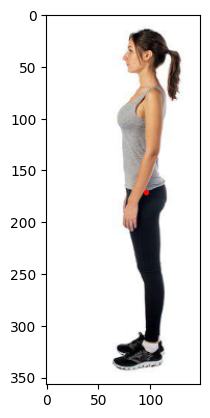

In [14]:
plt.imshow(image)

In [10]:
import math
def angle_between_lines(A, B, C, D):
    # Vector for Line 1 (AB)
    v1x, v1y = B[0] - A[0], B[1] - A[1]
    # Vector for Line 2 (CD)
    v2x, v2y = D[0] - C[0], D[1] - C[1]
    
    # Dot product and magnitudes
    dot_product = v1x * v2x + v1y * v2y
    magnitude_v1 = math.sqrt(v1x**2 + v1y**2)
    magnitude_v2 = math.sqrt(v2x**2 + v2y**2)
    
    # Calculate cosine of the angle
    cos_theta = dot_product / (magnitude_v1 * magnitude_v2)
    
    # Compute the angle in radians and then convert to degrees
    theta_radians = math.acos(cos_theta)
    theta_degrees = math.degrees(theta_radians)
    
    return theta_degrees

In [11]:
A = res_list[body_parts["Right Hip"]]
B = res_list[body_parts["Right Shoulder"]]
C = res_list[body_parts["Nose"]]

In [12]:
angle_between_lines(A,B,B,C)

24.264226162268663